    x0  x1        x2     Error
0    0   1 -3.113605  7.113605
1    0   1 -1.025422  2.088183
2    0   1 -1.815015  0.789593
3    0   1 -2.270081  0.455066
4    0   1 -2.045932  0.224149
5    0   1 -2.197045  0.151113
6    0   1 -2.103165  0.093880
7    0   1 -2.165545  0.062380
8    0   1 -2.125537  0.040008
9    0   1 -2.151865  0.026328
10   0   1 -2.134805  0.017059
11   0   1 -2.145977  0.011171
12   0   1 -2.138710  0.007267


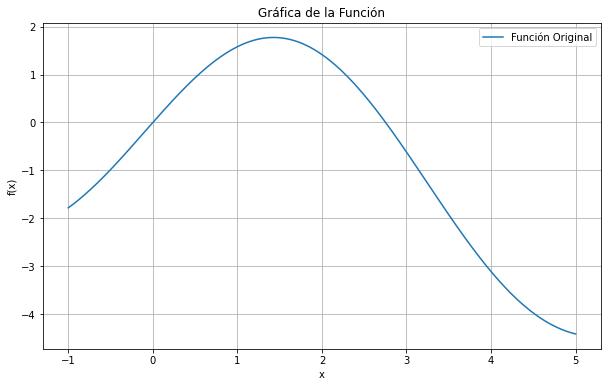

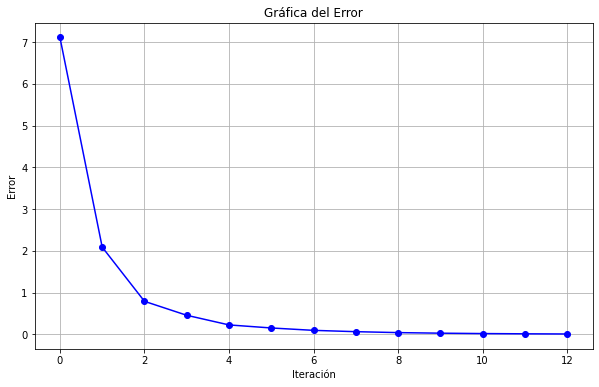

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def funcion(x):
    return 2 * np.sin(x) - (x**2 / 10)

def interpolacion_cuadratica(x0, x1, x2, f):
    
    #x3= (f(x0)*((x1^2)-(x2^2))+f(x1)*((x2^2)-(x0^2))+f(x2)*((x0^2)-(x1^2)))/(2*f(x0)*(x1-x2)+2*f(x1)*(x2-x0)+f(x2)*(x0-x1))
    
    f0 = f(x0)
    f1 = f(x1)
    f2 = f(x2)
    
    def P(x):
        L0 = ((x-x1)*(x-x2))/((x0-x1)*(x0-x2))
        L1 = ((x-x0)*(x-x2))/((x1-x0)*(x1-x2))
        L2 = ((x-x0)*(x-x1))/((x2-x0)*(x2-x1))
    
        return f0*L0 + f1*L1 + f2*L2
    
    return P

# Valores iniciales
x0 = 0
x1 = 1
x2 = 4

x_ant = x2 + 2  
error = float('inf')

resultados = []

while error > 0.01:
    
    f0 = funcion(x0)
    f1 = funcion(x1)
    f2 = funcion(x2)
    
    interpolacion = interpolacion_cuadratica(x0, x1, x2, funcion)
    
    x3 = interpolacion(x2)
    error = abs(x3 - x2)
    x_ant = x2
    x2 = x3
    
    resultados.append([x0, x1, x2, error])

tabla_resultados = pd.DataFrame(resultados, columns=['x0', 'x1', 'x2', 'Error'])

x = np.linspace(-1, 5, 400)
y = funcion(x)

# Gráfica de la función
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Función Original')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la Función')
plt.legend()
plt.grid()

# Gráfica del error
plt.figure(figsize=(10, 6))
plt.plot(tabla_resultados.index, tabla_resultados['Error'], marker='o', linestyle='-', color='blue')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.title('Gráfica del Error')
plt.grid()

print(tabla_resultados)

plt.show()